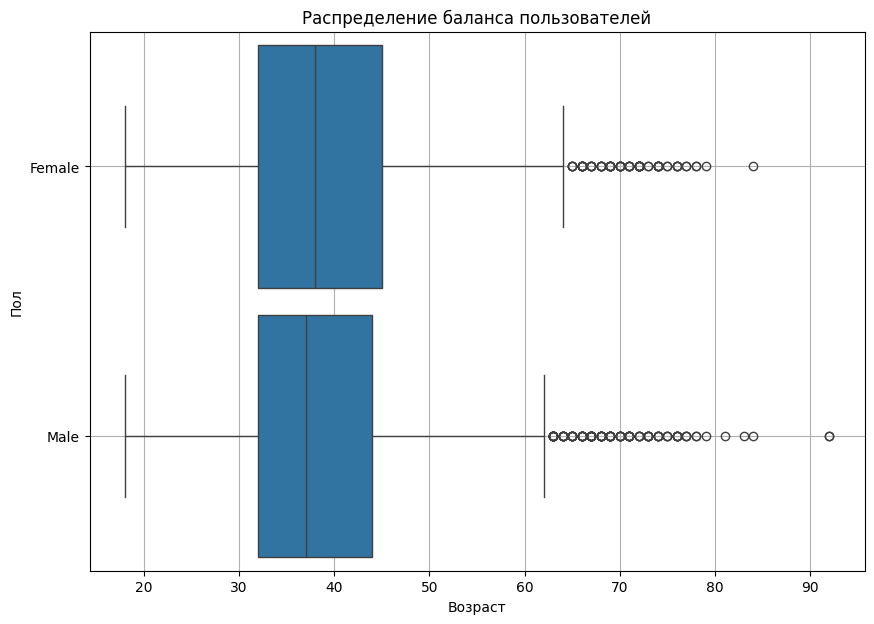

In [63]:
# Задание №9.2
#Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns



churn_data_balance = churn_data[churn_data['Balance'] >= 2500]


fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data_balance,
    y='Gender',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса пользователей');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Пол');
boxplot.grid()



C:\Users\You are drop\AppData\Local\Temp\ipykernel_984\2438065324.py:23: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  churn_data_loyal['Exited'][churn_data_loyal['Exited']==0] = "Лояльные клиенты";
C:\Users\You are drop\AppData\Local\Temp\i

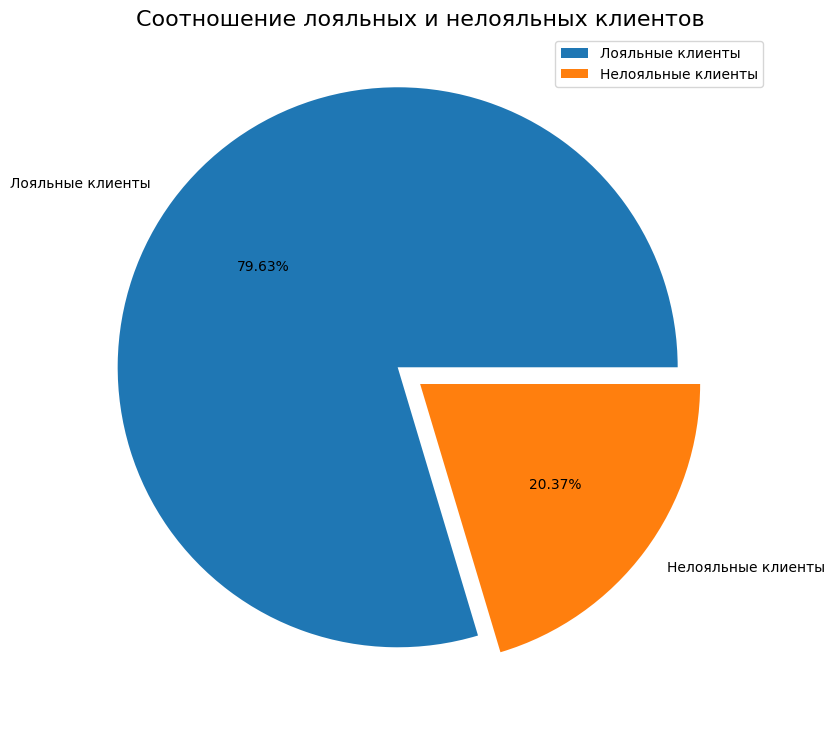

In [48]:
import pandas as pd

churn_data = pd.read_csv('data_2/churn.csv', sep=',')
#display(churn_data.head())

churn_data.drop('RowNumber', axis=1, inplace=True)
#display(churn_data.head())

import plotly
import plotly.express as px
#print(plotly.__version__)

import matplotlib.pyplot as plt
%matplotlib inline



# Задание №9.1

#Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

churn_data_loyal = churn_data
churn_data_loyal['Exited'][churn_data_loyal['Exited']==0] = "Лояльные клиенты";
churn_data_loyal['Exited'][churn_data_loyal['Exited']==1] = "Нелояльные клиенты";
#display(churn_data_loyal);

churn_data_exited = churn_data_loyal['Exited'].value_counts()
fig = plt.figure(figsize=(7, 7))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_exited,
    labels=churn_data_exited.index,
    autopct='%.2f%%',
    explode = [0.1, 0]
);
axes.set_title('Соотношение лояльных и нелояльных клиентов', fontsize=16)
axes.legend();


#Ответ на задание №9.1
#Количетво лояльных клиентов составляет 79,63% от общего числа клиентов.
#Количетво нелояльных клиентов составляет 20,37% от общего числа клиентов.











